In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/top50spotify2019/top50.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
df = pd.read_csv("../input/top50spotify2019/top50.csv", encoding='ISO-8859-1')


In [4]:
#To get an idea of the dataset that we are dealing with
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
df.shape

(50, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [7]:
# Dropping 'Unnamed: 0' since it doesn't consist of any relevant information
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.rename(columns={'Track.Name':'Track_Name', 
                   'Artist.Name':'Artist_Name',
                   'Beats.Per.Minute':'Beats_Per_Minute', 
                   'Loudness..dB..':'Loudness',
                   'Valence.':'Valence', 
                   'Length.':'Length', 
                   'Acousticness..':'Acousticness',
                   'Speechiness.':'Speechiness'}, inplace=True)

In [9]:
#To see our data after dropping Unnamed Column
df.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [10]:
#We want to see how each song is being measured by
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Beats_Per_Minute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Loudness,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


In [11]:
df.Genre.value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
country rap         2
reggaeton           2
electropop          2
panamanian pop      2
reggaeton flow      2
brostep             2
dfw rap             2
canadian pop        2
big room            1
trap music          1
boy band            1
escape room         1
australian pop      1
pop house           1
r&b en espanol      1
atl hip hop         1
Name: Genre, dtype: int64

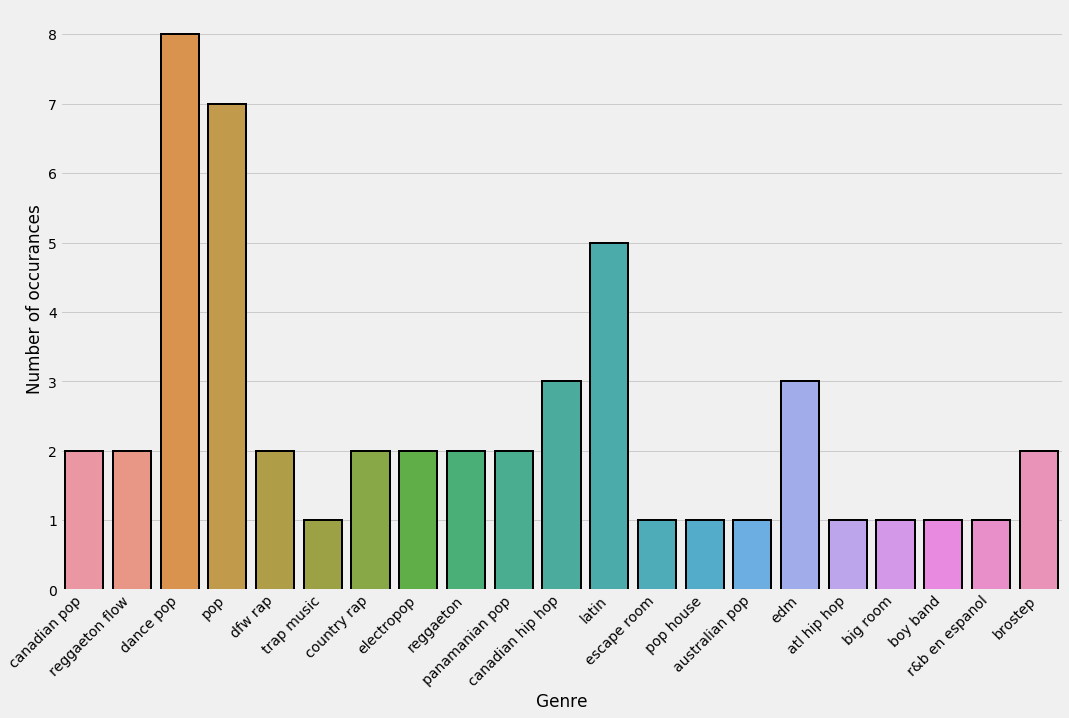

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,10));
sns.countplot(x="Genre", data=df, linewidth=2, edgecolor='black');
plt.ylabel('Number of occurances');
plt.xticks(rotation=45, ha='right');

In [13]:
df.Artist_Name.value_counts()

Ed Sheeran          4
Marshmello          2
Billie Eilish       2
J Balvin            2
The Chainsmokers    2
Ariana Grande       2
Post Malone         2
Lil Nas X           2
Sech                2
Shawn Mendes        2
ROSALÍA             1
Lewis Capaldi       1
Nicky Jam           1
Khalid              1
Jhay Cortez         1
Anuel AA            1
Lauv                1
Lizzo               1
Lady Gaga           1
Maluma              1
Daddy Yankee        1
DJ Snake            1
Drake               1
Y2K                 1
Jonas Brothers      1
Taylor Swift        1
MEDUZA              1
Katy Perry          1
Lil Tecca           1
Chris Brown         1
Tones and I         1
Sam Smith           1
Bad Bunny           1
Ali Gatie           1
Young Thug          1
Martin Garrix       1
Kygo                1
Lunay               1
Name: Artist_Name, dtype: int64

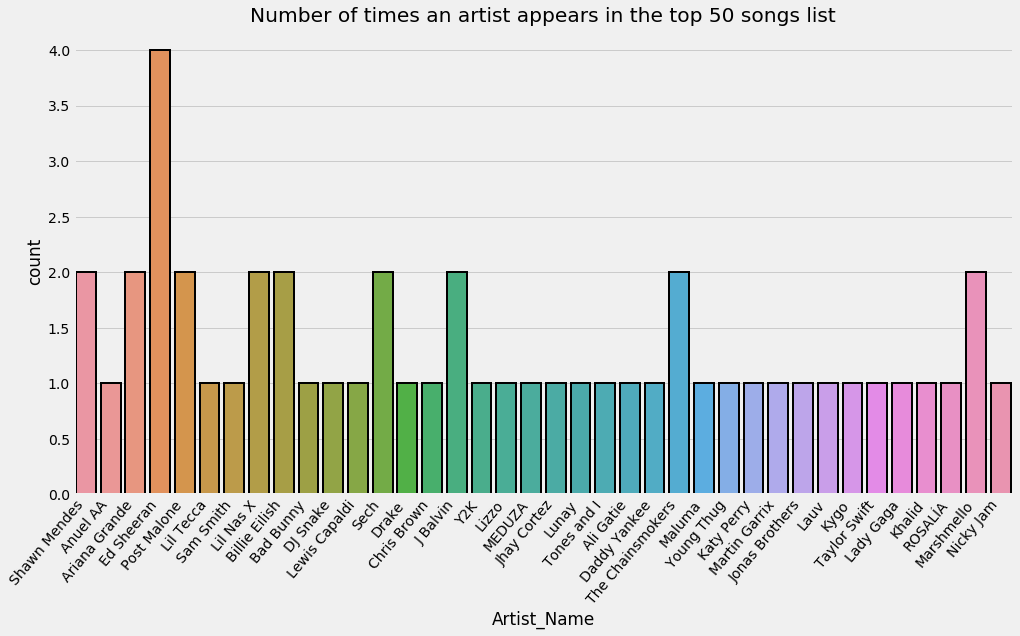

In [24]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.countplot(x=df['Artist_Name'],data=df, linewidth=2, edgecolor='black')
plt.title('Number of times an artist appears in the top 50 songs list')
plt.xticks(rotation=50, ha='right')
plt.show()


In [25]:
#We want to interpret the data of the top artists
top_artists = df.groupby('Artist_Name')
filtered_data = top_artists.filter(lambda x: x['Artist_Name'].value_counts() > 1)

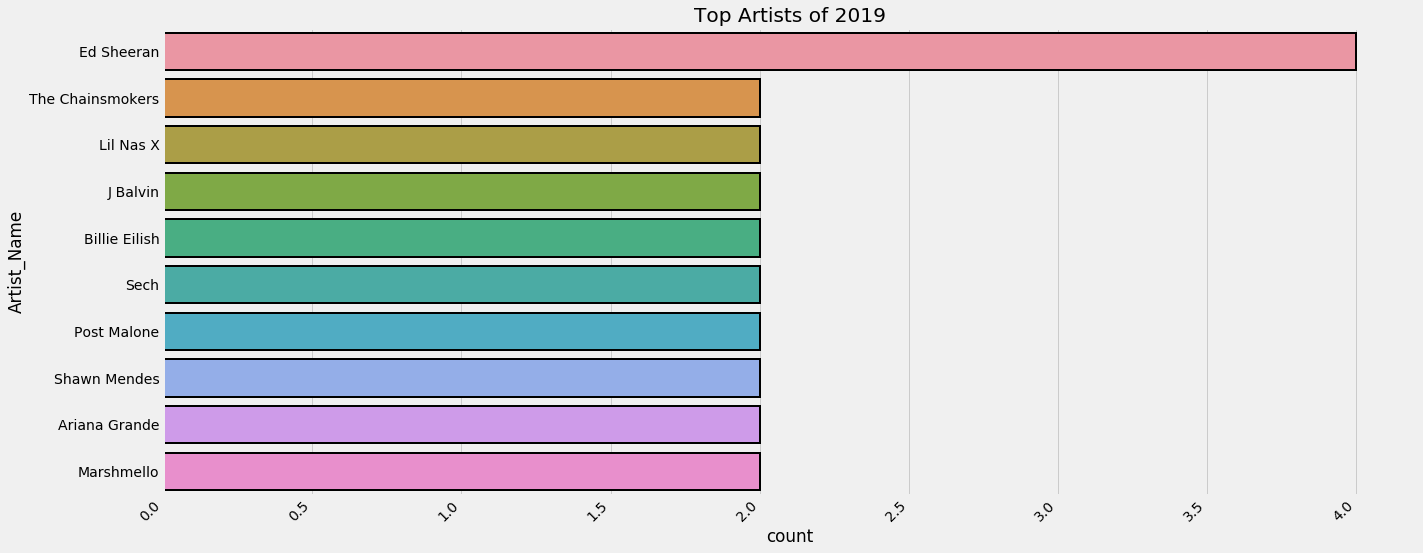

In [26]:
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')
sns.countplot(y=filtered_data['Artist_Name'],data=filtered_data, linewidth=2, edgecolor='black', order=filtered_data["Artist_Name"].value_counts().index)
plt.title('Top Artists of 2019')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:

# The data set contains the following fields:

# Track.Name — Name of Track
# Artist.Name — Name of the Artist
# Genre — Genre of Track
# Beats.Per.Minute — Tempo of the Song
# Energy — The energy of Song — the higher the value the more energetic
# Danceability — Thee higher the value, the easier it is to dance to the song
# Loudness..dB.. — The higher the value, the louder the song.
# Liveness — The higher the value, the more likely the song is a live recording.
# Valence. — The higher the value, the more positive mood for the song.
# Length. — The duration of the song.
# Acousticness.. The higher the value the more acoustic the song
# Speechiness. — The higher the value the more spoken word the song contains
# Popularity — The higher the value the more popular the song is.



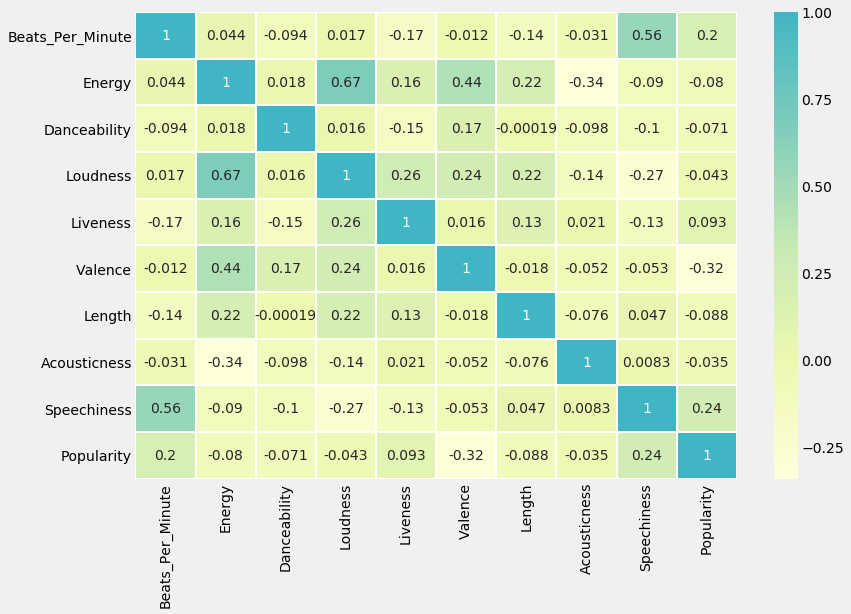

In [27]:
# We want to see if there is a strong correlation between how songs are 
correlations = df.corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, linewidths=1, cmap='YlGnBu', center=1)
plt.show()


In [29]:
# As we can see the only categories that are greater than .50 is:
# Beats_per_Minute and Speechiness
# Loudness and Energy
# This tells us that these 2 are moderately correlated 